In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy import stats

In [63]:
df = pd.read_csv('./data/merc.csv')

In [64]:
df.shape

(13119, 9)

In [65]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [66]:
df.shape

(13119, 9)

In [67]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [68]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [69]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


# EDA

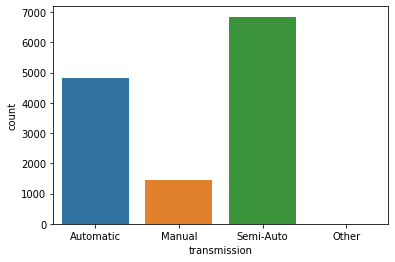

In [70]:
sns.countplot(df['transmission'])
plt.show()

Most of the cars on the dataset are with automatic and semi-automatic transmission with very few cars in automatic and semi-automatic transmission 

 C Class      0.285616
 A Class      0.195213
 E Class      0.148868
 GLC Class    0.073176
 GLA Class    0.064563
 B Class      0.045049
 CL Class     0.038951
 GLE Class    0.035140
 SL CLASS     0.019819
 CLS Class    0.018065
 V Class      0.015779
 S Class      0.015016
 GL Class     0.009223
 SLK          0.007241
 CLA Class    0.006555
 X-CLASS      0.006250
 M Class      0.006022
 GLS Class    0.005641
 GLB Class    0.001448
 G Class      0.001143
 CLK          0.000534
 CLC Class    0.000229
 R Class      0.000152
220           0.000076
200           0.000076
230           0.000076
180           0.000076
Name: model, dtype: float64


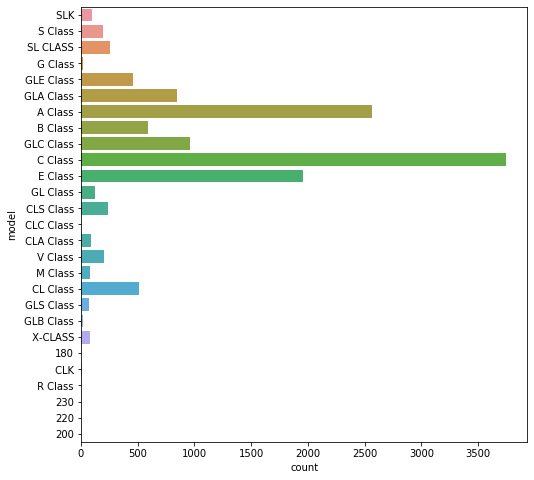

In [71]:
print(df['model'].value_counts()/len(df))
plt.figure(figsize=(8,8))
sns.countplot(y = df['model'])
plt.show()

Top 3 cars are C Class,A Class,E Class

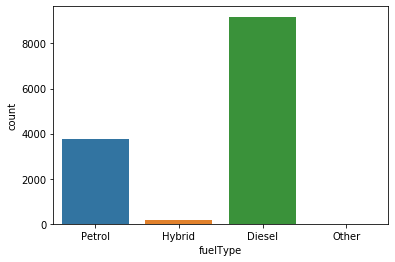

In [72]:
sns.countplot(df['fuelType'])
plt.show()

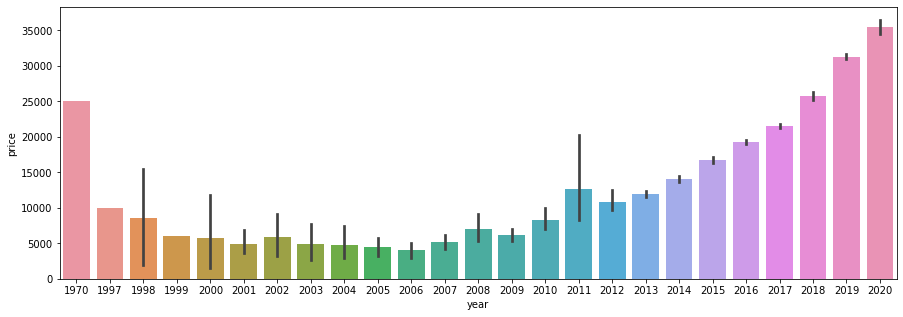

In [73]:
plt.figure(figsize=(15,5),facecolor='w')
sns.barplot(x= df['year'],y=df['price'])
plt.show()

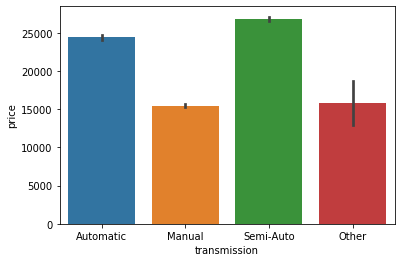

In [74]:
sns.barplot(x= df['transmission'],y=df['price'])
plt.show()

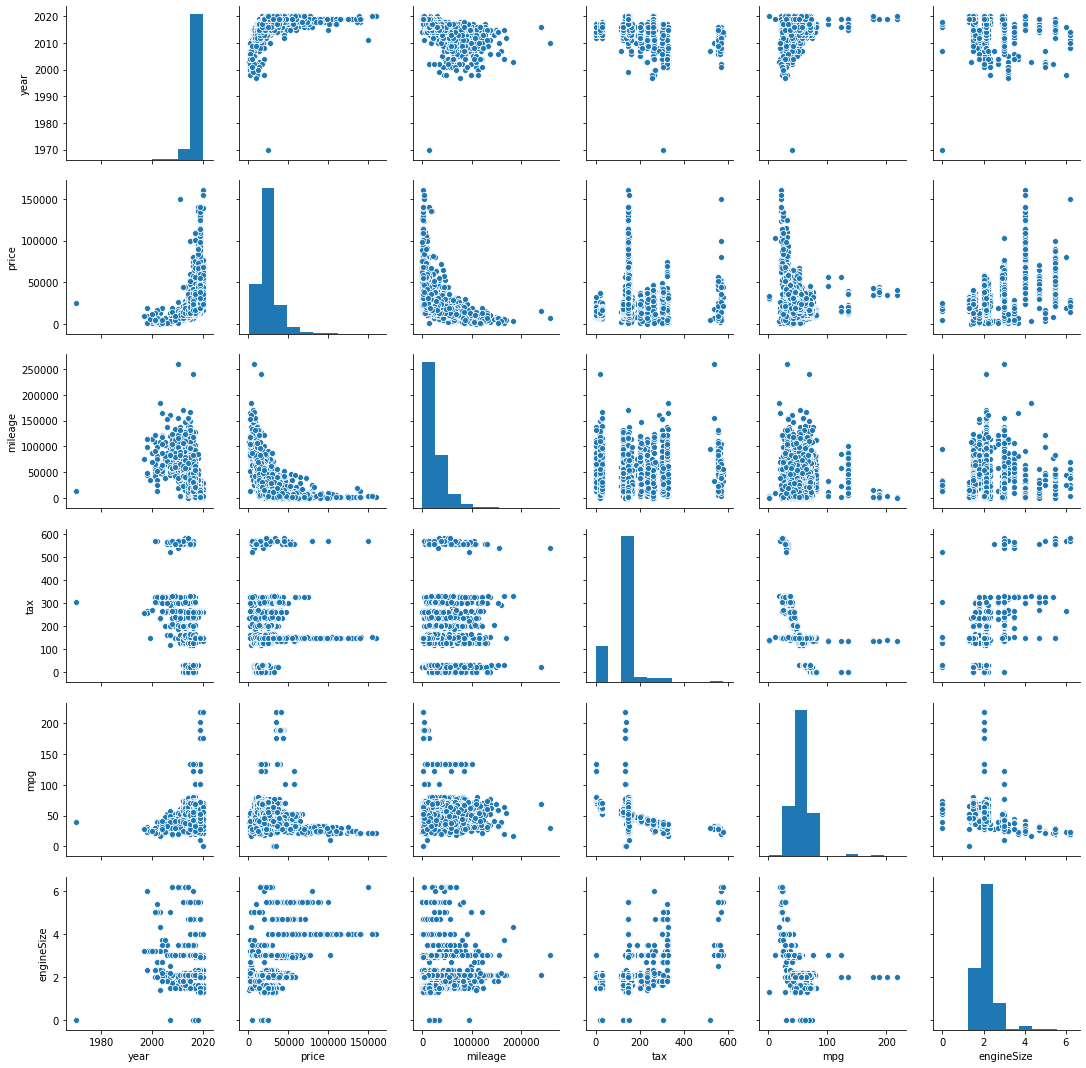

In [75]:
sns.pairplot(df)
plt.show()

# Feature Engineering

In [76]:
df_new = df.copy()

In [77]:
df_new.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [79]:
df_new = pd.get_dummies(df)

In [80]:
df_new.head()

,year,price,mileage,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,...,model_220,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2005,5200,63000,325,32.1,1.8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2017,34948,27000,20,61.4,2.1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2016,49948,6200,555,28.0,5.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,61948,16000,325,30.4,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2016,73948,4000,325,30.1,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [81]:
df_new.shape

(13119, 41)

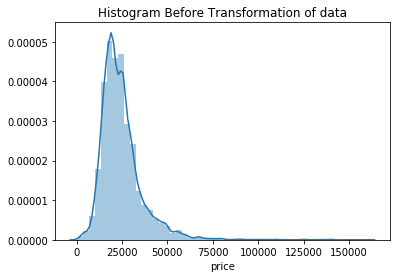

Skewness: 2.6507643792471915
Kurtosis: 15.44818787024034


In [82]:
sns.distplot(df_new.loc[:,'price'],norm_hist=True)
plt.title('Histogram Before Transformation of data')
plt.show()
print("Skewness: " + str(df_new['price'].skew()))
print("Kurtosis: " + str(df_new['price'].kurt()))

In [83]:
log_df = df_new.copy()

In [84]:
log_df['price'] = np.log1p(df_new['price'])

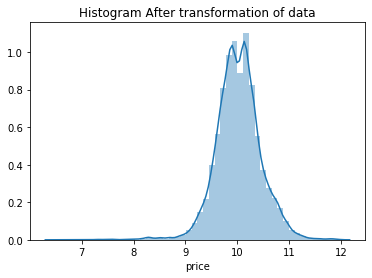

Skewness: -0.3107672193695445
Kurtosis: 3.005047682651729


In [85]:
sns.distplot(log_df.loc[:,'price'],norm_hist=True)
plt.title('Histogram After transformation of data')
plt.show()
print("Skewness: " + str(log_df['price'].skew()))
print("Kurtosis: " + str(log_df['price'].kurt()))

In [86]:
log_df.head()

,year,price,mileage,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,...,model_220,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2005,8.556606,63000,325,32.1,1.8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2017,10.461645,27000,20,61.4,2.1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2016,10.818758,6200,555,28.0,5.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,11.034067,16000,325,30.4,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2016,11.211131,4000,325,30.1,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [87]:
X = log_df.drop('price',axis=1)
y = log_df['price']

In [88]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
lr.score(x_test,y_test)

0.8865372106140976

In [92]:
y_pred = lr.predict(x_test)

In [93]:
mse = mean_squared_error(y_test,y_pred)

In [94]:
r2 = r2_score(y_test,y_pred)

In [95]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [96]:
print("MSE:- {}".format(mse))
print("R2 Score:- {}".format(r2))
print("RMSE:- {}".format(rmse))

MSE:- 0.020991118787702944
R2 Score:- 0.8865372106140976
RMSE:- 0.14488312112769708


In [97]:
results = x_test.copy()
results['predicted'] = np.expm1(lr.predict(x_test))
results['actual'] = np.expm1(y_test)
results = results[['predicted','actual']]
results['predicted'] = results['predicted'].round(2)

In [98]:
results

,predicted,actual
2440,26440.80,25780.0
3933,21218.08,21190.0
9640,14036.98,15995.0
1151,20531.50,19298.0
10939,16848.83,24499.0
3468,25099.90,23499.0
7197,24971.22,25149.0
7067,25604.35,30500.0
12754,19919.97,17780.0
8357,27453.27,28849.0
